# Group - Number: 3
### Team Members:
- Yen Nga Le - 0824817
- Tehsin Shaikh - 0831234
- Srilakshmi Gummadidala - 0803509
- Vinod Soloman Santhakumar - 0821990

# 1. Load libraries

In [1]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data

In [2]:
df = pd.read_csv('Major_Crime_Indicators_Open_Data.csv')
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.837009e+06,5.414638e+06,1,GO-20141265238,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,98,Rosedale-Moore Park,98,Rosedale-Moore Park (98),-79.384206,43.670798
1,-8.832733e+06,5.419701e+06,2,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.345795,43.703684
2,-8.836444e+06,5.410819e+06,3,GO-20141262027,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,166,St Lawrence-East Bayfront-The Islands,77,Waterfront Communities-The Island (77),-79.379131,43.645981
3,-8.836897e+06,5.412101e+06,4,GO-20141259951,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1460,100,Assault Peace Officer,Assault,170,Yonge-Bay Corridor,76,Bay Street Corridor (76),-79.383200,43.654313
4,-8.851435e+06,5.422186e+06,5,GO-20141261561,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1420,100,Assault With Weapon,Assault,154,Oakdale-Beverley Heights,26,Downsview-Roding-CFB (26),-79.513797,43.719824


# 3. Exploratory Data Analysis

## 3.1 Understand Column Labels

- **EVENT_UNIQUE_ID:**   Offence Number
- **REPORT_DATE:**   Date Offence was Reported (time is displayed in UTC format when downloaded as a CSV)
- **OCC_DATE:** Date Offence Occurred (time is displayed in UTC format when downloaded as a CSV)
- **REPORT_YEAR:** Year Offence was Reported
- **REPORT_MONTH:** Month Offence was Reported
- **REPORT_DAY:** Day of the Month Offence was Reported
- **REPORT_DOY:** Day of the Year Offence was Reported
- **REPORT_DOW:** Day of the Week Offence was Reported
- **REPORT_HOUR:** Hour Offence was Reported
- **OCC_YEAR:** Year Offence Occurred
- **OCC_MONTH:** Month Offence Occurred
- **OCC_DAY:** Day of the Month Offence Occurred
- **OCC_DOY:** Day of the Year Offence Occurred
- **OCC_DOW:** Day of the Week Offence Occurred
- **OCC_HOUR:** Hour Offence Occurred
- **DIVISION:** Police Division where Offence Occurred
- **LOCATION_TYPE:** Location Type of Offence
- **PREMISES_TYPE:** Premises Type of Offence
- **UCR_CODE:** UCR Code for Offence
- **UCR_EXT:** UCR Extension for Offence
- **OFFENCE:** Title of Offence
- **MCI_CATEGORY:** MCI Category of Occurrence
- **HOOD_158:** Identifier of Neighbourhood using City of Toronto's new 158 neighbourhood structure
- **NEIGHBOURHOOD_158:** Name of Neighbourhood using City of Toronto's new 158 neighbourhood structure
- **HOOD_140:** Identifier of Neighbourhood using City of Toronto's old 140 neighbourhood structure
- **NEIGHBOURHOOD_140:** Name of Neighbourhood using City of Toronto's old 140 neighbourhood structure
- **LONG_WGS84:** Longitude Coordinates (Offset to nearest intersection)
- **LAT_WGS84:** Latitude Coordinates (Offset to nearest intersection)
- **X** and **Y** are the same actual longitude and Latitude values

In [3]:
#Display the summary of the DataFrame df, including the number of non-null values, the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360187 entries, 0 to 360186
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  360187 non-null  float64
 1   Y                  360187 non-null  float64
 2   OBJECTID           360187 non-null  int64  
 3   EVENT_UNIQUE_ID    360187 non-null  object 
 4   REPORT_DATE        360187 non-null  object 
 5   OCC_DATE           360187 non-null  object 
 6   REPORT_YEAR        360187 non-null  int64  
 7   REPORT_MONTH       360187 non-null  object 
 8   REPORT_DAY         360187 non-null  int64  
 9   REPORT_DOY         360187 non-null  int64  
 10  REPORT_DOW         360187 non-null  object 
 11  REPORT_HOUR        360187 non-null  int64  
 12  OCC_YEAR           360076 non-null  float64
 13  OCC_MONTH          360076 non-null  object 
 14  OCC_DAY            360076 non-null  float64
 15  OCC_DOY            360076 non-null  float64
 16  OC

In [4]:
# Checking unique values
df.nunique()

X                     23535
Y                     23534
OBJECTID             360187
EVENT_UNIQUE_ID      313796
REPORT_DATE            3560
OCC_DATE               4035
REPORT_YEAR              10
REPORT_MONTH             12
REPORT_DAY               31
REPORT_DOY              366
REPORT_DOW                7
REPORT_HOUR              24
OCC_YEAR                 24
OCC_MONTH                12
OCC_DAY                  31
OCC_DOY                 366
OCC_DOW                   7
OCC_HOUR                 24
DIVISION                 18
LOCATION_TYPE            54
PREMISES_TYPE             7
UCR_CODE                 22
UCR_EXT                  16
OFFENCE                  51
MCI_CATEGORY              5
HOOD_158                159
NEIGHBOURHOOD_158       159
HOOD_140                141
NEIGHBOURHOOD_140       141
LONG_WGS84            23537
LAT_WGS84             23537
dtype: int64

## 3.2 Handle Missing Values Duplicate Values

In [5]:
#Display the number of missing values for each column of the DataFrame df
df.isnull().sum()

X                      0
Y                      0
OBJECTID               0
EVENT_UNIQUE_ID        0
REPORT_DATE            0
OCC_DATE               0
REPORT_YEAR            0
REPORT_MONTH           0
REPORT_DAY             0
REPORT_DOY             0
REPORT_DOW             0
REPORT_HOUR            0
OCC_YEAR             111
OCC_MONTH            111
OCC_DAY              111
OCC_DOY              111
OCC_DOW              111
OCC_HOUR               0
DIVISION               0
LOCATION_TYPE          0
PREMISES_TYPE          0
UCR_CODE               0
UCR_EXT                0
OFFENCE                0
MCI_CATEGORY           0
HOOD_158               0
NEIGHBOURHOOD_158      0
HOOD_140               0
NEIGHBOURHOOD_140      0
LONG_WGS84             0
LAT_WGS84              0
dtype: int64

In [6]:
# dropping null values to ensure complete and reliable data for analysis
df = df.dropna()
df.isnull().sum()

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

In [7]:
# Dropping X and Y columns which are the same actual longitude and Latitude values
df = df.drop(columns = ['X', 'Y'], axis = 1)

In [8]:
# Filter the DataFrame to remove data from years 2003 to 2013
df = df[df['OCC_YEAR'] >= 2014]

In [9]:
#Check for duplicates
duplicates = df.duplicated()
count_duplicates = duplicates.sum()

print(duplicates)
print("Number of duplicate rows:", count_duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
360182    False
360183    False
360184    False
360185    False
360186    False
Length: 358663, dtype: bool
Number of duplicate rows: 0


## 3.3 Statistical Analysis

In [10]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",df.nunique())

Rows     :  358663
Columns  :  29

Features : 
 ['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84']

Unique values :  
 OBJECTID             358663
EVENT_UNIQUE_ID      312548
REPORT_DATE            3560
OCC_DATE               3560
REPORT_YEAR              10
REPORT_MONTH             12
REPORT_DAY               31
REPORT_DOY              366
REPORT_DOW                7
REPORT_HOUR              24
OCC_YEAR                 10
OCC_MONTH                12
OCC_DAY                  31
OCC_DOY                 366
OCC_DOW                   7
OCC_HOUR                 24
DIVISION                 18
LOCATION_TYPE            54
PREMISES_TYPE         

In [11]:
# save the cleaned dataset for further analysis 
df.to_csv('MCI_clean.csv', index = False)
df_all = df.copy()

In [12]:
# Top five rows as columns for better column readability
df.head().T

,0,1,2,3,4
OBJECTID,1,2,3,4,5
EVENT_UNIQUE_ID,GO-20141265238,GO-20141259834,GO-20141262027,GO-20141259951,GO-20141261561
REPORT_DATE,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00
OCC_DATE,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00
REPORT_YEAR,2014,2014,2014,2014,2014
REPORT_MONTH,January,January,January,January,January
REPORT_DAY,1,1,1,1,1
REPORT_DOY,1,1,1,1,1
REPORT_DOW,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
REPORT_HOUR,0,0,10,3,8


In [13]:
df.describe()

,OBJECTID,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,UCR_CODE,UCR_EXT,LONG_WGS84,LAT_WGS84
count,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000
mean,180419.414922,2018.661961,15.746885,182.676479,12.725411,2018.626532,15.478923,182.069160,12.596741,1709.164107,147.296376,-78.431269,43.174642
std,103832.675535,2.839518,8.765210,102.333670,6.481194,2.834770,8.906457,102.701935,7.261156,328.727657,52.216765,8.708218,4.793629
min,1.000000,2014.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,1410.000000,100.000000,-80.042906,0.000000
25%,90567.500000,2016.000000,8.000000,96.000000,8.000000,2016.000000,8.000000,95.000000,7.000000,1430.000000,100.000000,-79.474368,43.659878
50%,180477.000000,2019.000000,16.000000,184.000000,13.000000,2019.000000,16.000000,183.000000,14.000000,1457.000000,100.000000,-79.394138,43.699348
75%,270340.500000,2021.000000,23.000000,268.000000,18.000000,2021.000000,23.000000,268.000000,19.000000,2120.000000,200.000000,-79.322439,43.750842
max,360187.000000,2023.000000,31.000000,366.000000,23.000000,2023.000000,31.000000,366.000000,23.000000,2135.000000,230.000000,0.000000,44.351392


## 3.4 Column Level Analysis

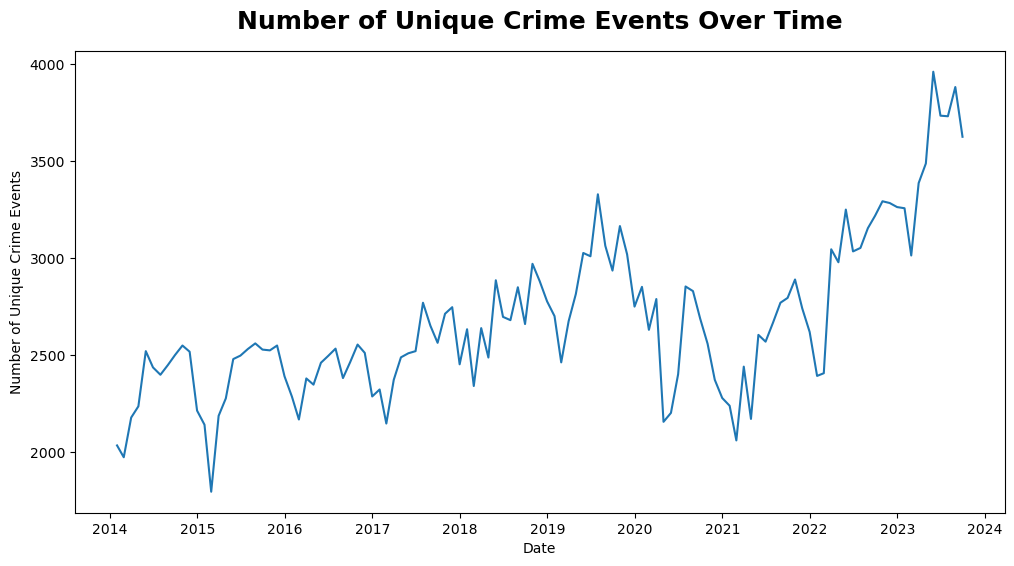

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime objects for better analysis
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'])
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])


# Count the number of unique events per month
monthly_counts = df.resample('M', on='REPORT_DATE')['EVENT_UNIQUE_ID'].nunique()

# Plot the number of unique events over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Number of Unique Crime Events Over Time',fontsize=18, fontweight='bold', y=1.03)
plt.xlabel('Date')
plt.ylabel('Number of Unique Crime Events')
plt.show()

In [15]:
# count of unique values in the 'MCI_CATEGORY' column 
df.MCI_CATEGORY.value_counts()

Assault            190630
Break and Enter     67789
Auto Theft          55283
Robbery             33016
Theft Over          11945
Name: MCI_CATEGORY, dtype: int64

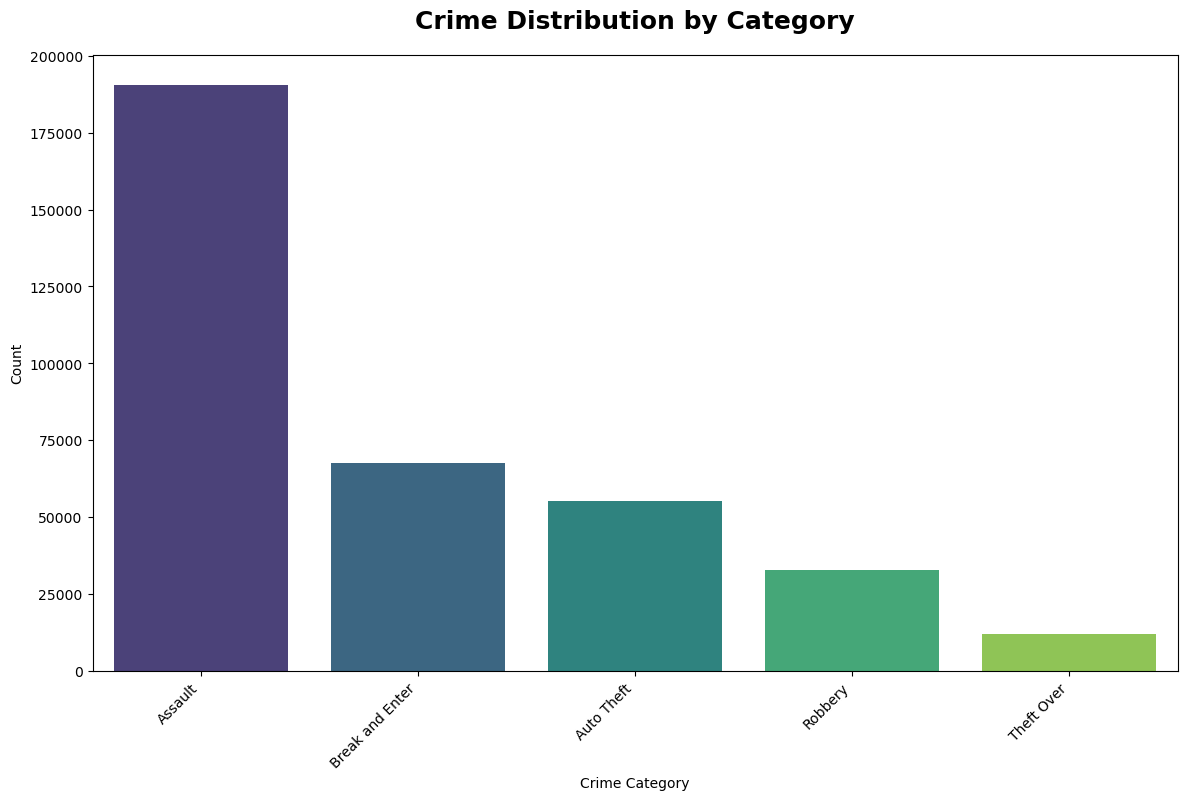

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of crimes by category
plt.figure(figsize=(14, 8))
sns.countplot(x='MCI_CATEGORY', data=df, order=df['MCI_CATEGORY'].value_counts().index, palette='viridis')
plt.title('Crime Distribution by Category',fontsize=18, fontweight='bold', y=1.03)
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

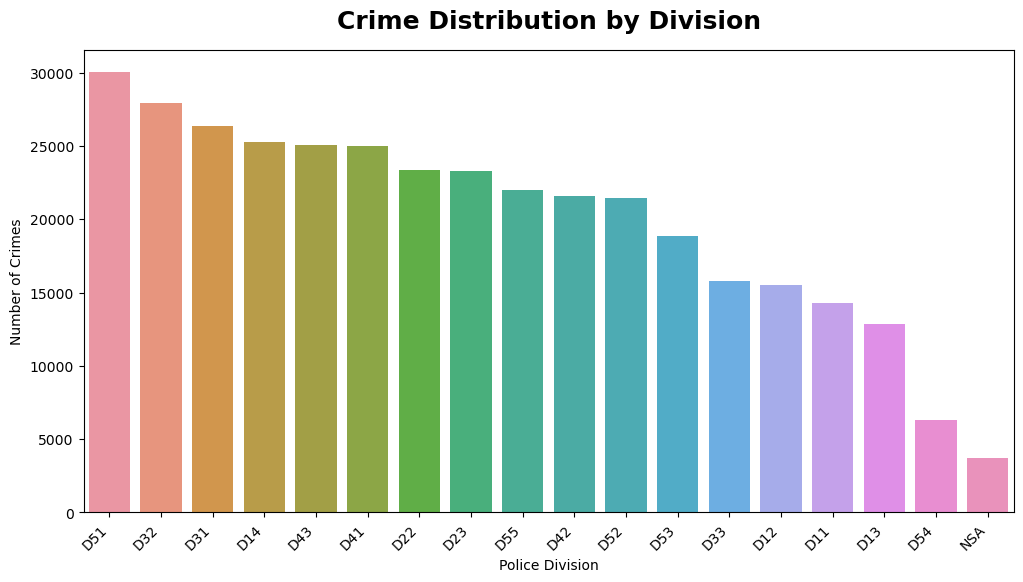

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for crime distribution by division
plt.figure(figsize=(12, 6))
sns.countplot(x='DIVISION', data=df, order=df['DIVISION'].value_counts().index)
plt.title('Crime Distribution by Division',fontsize=18, fontweight='bold', y=1.03)
plt.xlabel('Police Division')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


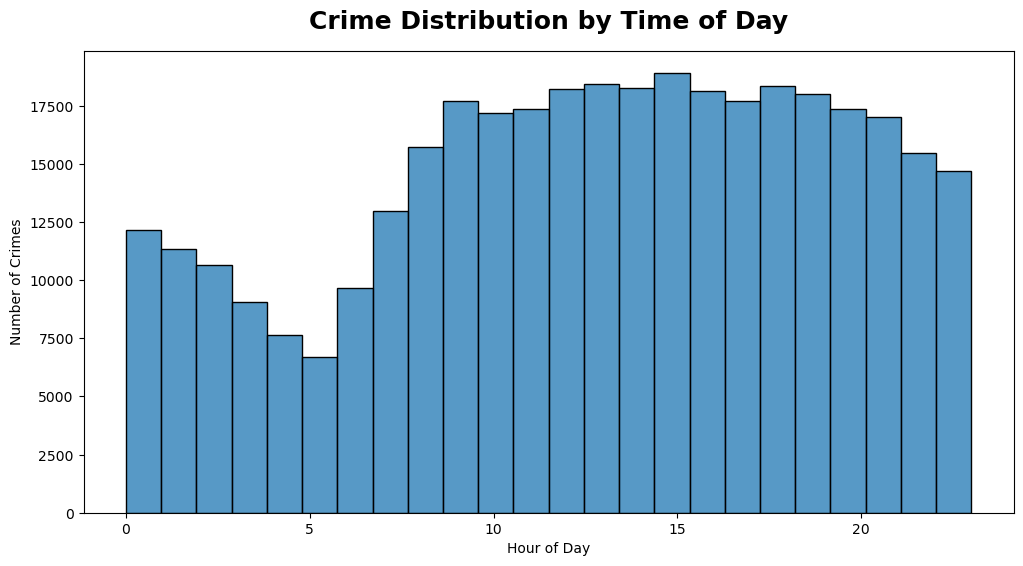

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for crime distribution by hour
plt.figure(figsize=(12, 6))
sns.histplot(df['REPORT_HOUR'], bins=24, kde=False)
plt.title('Crime Distribution by Time of Day',fontsize=18, fontweight='bold', y=1.03)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()

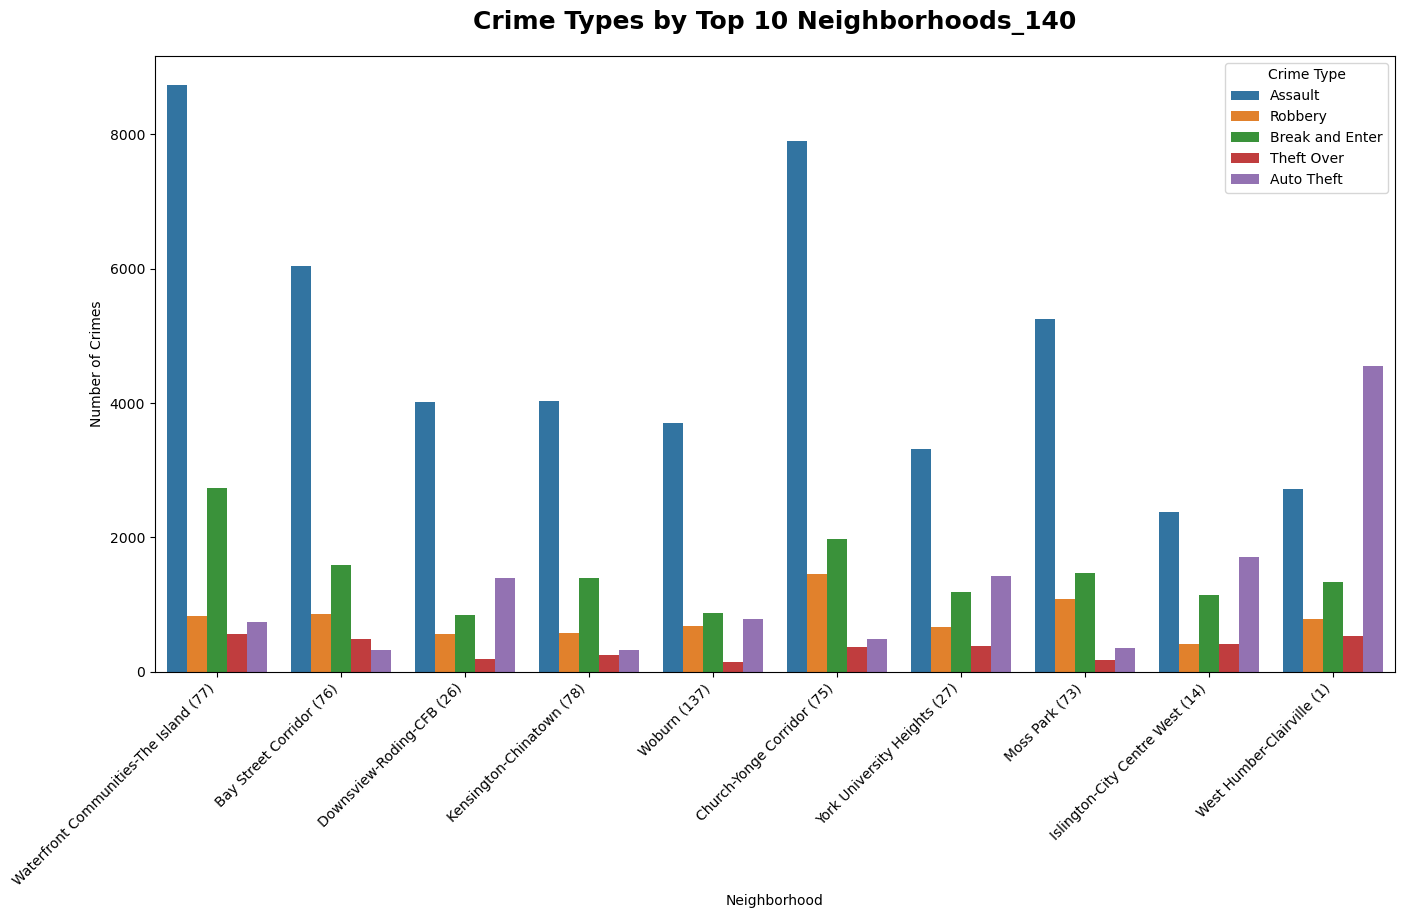

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 neighborhoods based on the number of crimes
top_neighborhoods = df['NEIGHBOURHOOD_140'].value_counts().nlargest(10).index

# Filter the dataset for the top 10 neighborhoods
df_top_neighborhoods = df[df['NEIGHBOURHOOD_140'].isin(top_neighborhoods)]

# Plot the count of each crime category in the top 10 neighborhoods
plt.figure(figsize=(16, 8))
sns.countplot(x='NEIGHBOURHOOD_140', hue='MCI_CATEGORY', data=df_top_neighborhoods)
plt.title('Crime Types by Top 10 Neighborhoods_140',fontsize=18, fontweight='bold', y=1.03)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1))
plt.show()

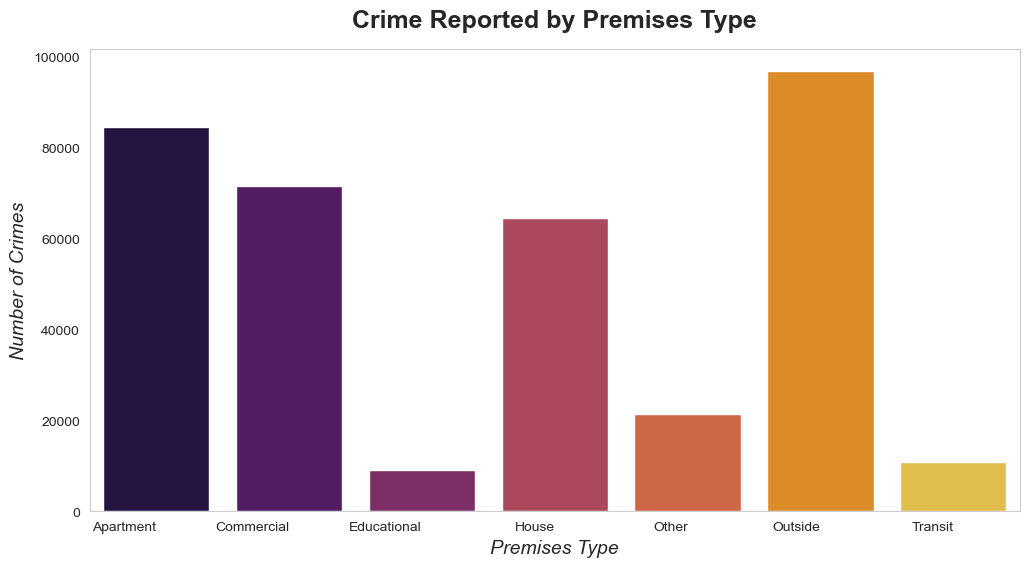

In [19]:
# Group by premises type and count the number of crimes
df_premises = df.groupby('PREMISES_TYPE').size().reset_index(name='count')
df_premises = df_premises.rename(columns={'X': 'Count'})

# Bar graph for Premises type distribution
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='PREMISES_TYPE', y='count', data=df_premises, palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
ax.set_title('Crime Reported by Premises Type',fontsize=18, fontweight='bold', y=1.03)
ax.set_xlabel('Premises Type',fontsize=14, fontstyle='italic')
ax.set_ylabel('Number of Crimes',fontsize=14, fontstyle='italic')
ax.grid(False)
plt.show()

      OCC_DOW  count
0  Friday      54037
2  Saturday    52878
3  Sunday      51005
4  Thursday    50739
6  Wednesday   50597
1  Monday      49963
5  Tuesday     49444


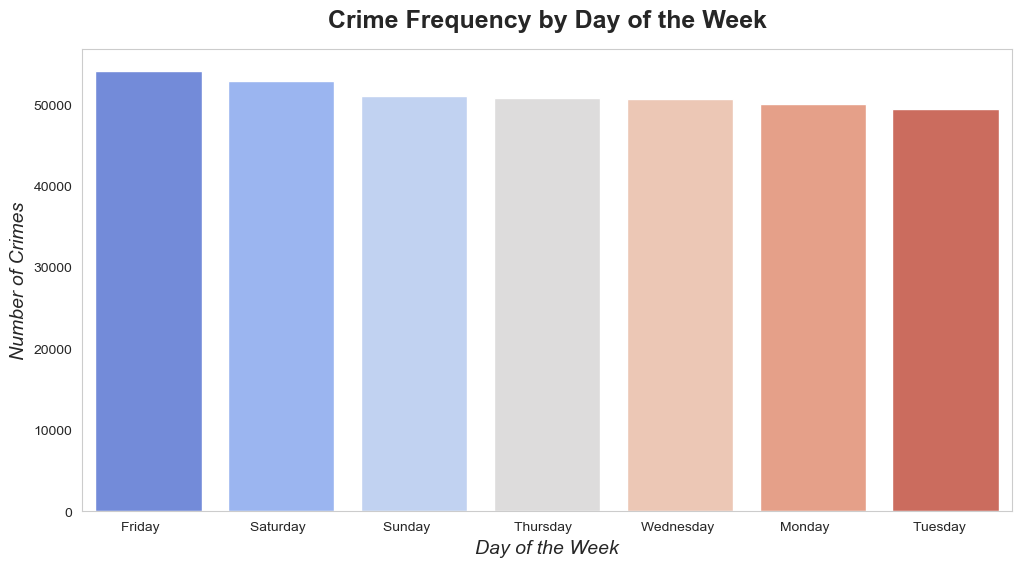

In [20]:
#Check the count of occurrences during each day of the week
df_dayofweek = df.groupby('OCC_DOW').size().reset_index(name='count')
df_dayofweek = df_dayofweek.rename(columns={'X': 'count'})
df_dayofweek = df_dayofweek.sort_values(by='count', ascending=False)
print(df_dayofweek)

#Plot the count of occurrences during the week
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='OCC_DOW', y='count', data=df_dayofweek, palette='coolwarm')
ax.set_title('Crime Frequency by Day of the Week', fontsize=18, fontweight='bold', y=1.03)
ax.set_xlabel('Day of the Week',fontsize=14, fontstyle='italic')
ax.set_ylabel('Number of Crimes',fontsize=14, fontstyle='italic')
ax.grid(False)
plt.show()

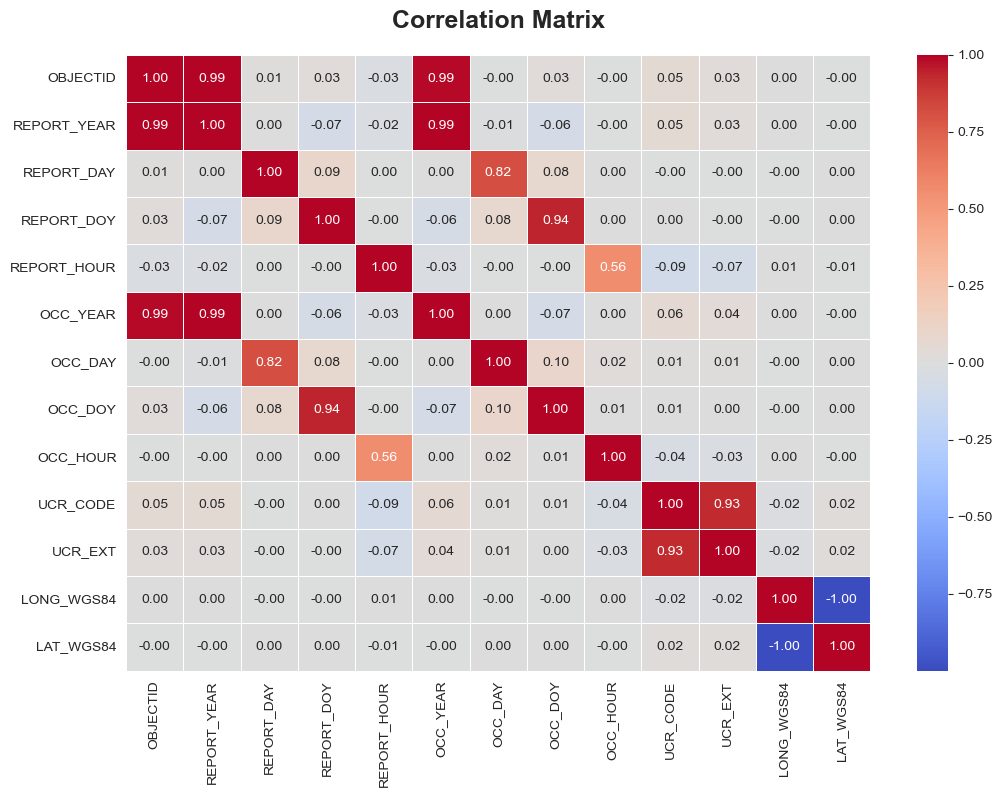

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix',fontsize=18, fontweight='bold', y=1.03)
plt.show()


# 4. Feature Engineering

In [22]:
df_cat = df.select_dtypes(include = 'object')
df_cat.head()

,EVENT_UNIQUE_ID,REPORT_MONTH,REPORT_DOW,OCC_MONTH,OCC_DOW,DIVISION,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,GO-20141265238,January,Wednesday,January,Wednesday,D53,Ttc Subway Station,Transit,Assault,Assault,98,Rosedale-Moore Park,98,Rosedale-Moore Park (98)
1,GO-20141259834,January,Wednesday,January,Wednesday,D53,Bar / Restaurant,Commercial,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55)
2,GO-20141262027,January,Wednesday,January,Wednesday,D52,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,166,St Lawrence-East Bayfront-The Islands,77,Waterfront Communities-The Island (77)
3,GO-20141259951,January,Wednesday,January,Wednesday,D52,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault Peace Officer,Assault,170,Yonge-Bay Corridor,76,Bay Street Corridor (76)
4,GO-20141261561,January,Wednesday,January,Wednesday,D31,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,Assault With Weapon,Assault,154,Oakdale-Beverley Heights,26,Downsview-Roding-CFB (26)


In [23]:
# Define a mapping dictionary for month names to numerical values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Apply the mapping to convert month names to numerical values
df['REPORT_MONTH'] = df['REPORT_MONTH'].map(month_mapping)
df['OCC_MONTH'] = df['OCC_MONTH'].map(month_mapping)

# Convert REPORT_MONTH to numerical values
df['REPORT_MONTH'] = df['REPORT_MONTH'].astype(int)

# Convert REPORT_MONTH to numerical values
df['OCC_MONTH'] = df['OCC_MONTH'].astype(int)

In [24]:
df['OCC_DOW'].unique()

array(['Wednesday ', 'Thursday  ', 'Friday    ', 'Saturday  ',
       'Sunday    ', 'Monday    ', 'Tuesday   '], dtype=object)

In [25]:
# Define a mapping dictionary for days of the week to numerical values
dow_mapping = {
    'Monday    ': 1,
    'Tuesday   ': 2,
    'Wednesday ': 3,
    'Thursday  ': 4,
    'Friday    ': 5,
    'Saturday  ': 6,
    'Sunday    ': 7
}

# Apply the mapping to convert days of the week to numerical values
df['OCC_DOW'] = df['OCC_DOW'].map(dow_mapping)
df['REPORT_DOW'] = df['REPORT_DOW'].map(dow_mapping)

In [26]:
df['DIVISION'].unique()

array(['D53', 'D52', 'D31', 'D32', 'D55', 'D14', 'D43', 'NSA', 'D54',
       'D13', 'D42', 'D22', 'D51', 'D41', 'D11', 'D12', 'D33', 'D23'],
      dtype=object)

In [27]:
# Frequency Encoding for DIVISION 
# Calculate frequency of each division
division_freq = df['DIVISION'].value_counts(normalize=True)

# Map frequency values to divisions
df['DIVISION'] = df['DIVISION'].map(division_freq)

In [28]:
# Calculate frequency of each location type
location_type_freq = df['LOCATION_TYPE'].value_counts(normalize=True)

# Map frequency values to location types
df['LOCATION_TYPE'] = df['LOCATION_TYPE'].map(location_type_freq)

In [29]:
df['PREMISES_TYPE'].unique()

array(['Transit', 'Commercial', 'Outside', 'House', 'Apartment', 'Other',
       'Educational'], dtype=object)

In [30]:
# Perform one-hot encoding for the PREMISES_TYPE feature
df = pd.get_dummies(df, columns=['PREMISES_TYPE'], prefix='PREM')

In [31]:
import category_encoders as ce

# Initialize CountEncoder
count_encoder = ce.CountEncoder()

# Apply CountEncoder to encode the OFFENCE feature
df['OFFENCE'] = count_encoder.fit_transform(df['OFFENCE'])

In [32]:
df['MCI_CATEGORY'].value_counts()

Assault            190630
Break and Enter     67789
Auto Theft          55283
Robbery             33016
Theft Over          11945
Name: MCI_CATEGORY, dtype: int64

In [33]:
# convert categorical values to numerical values
df['MCI_CATEGORY'] = pd.Categorical(df['MCI_CATEGORY']).codes

In [34]:
df['HOOD_158'].unique()

array(['98', '55', '166', '170', '154', '36', '69', '155', '164', '37',
       '136', '105', 'NSA', '59', '81', '143', '94', '174', '78', '148',
       '160', '100', '58', '72', '11', '122', '85', '80', '91', '123',
       '172', '20', '124', '95', '84', '111', '126', '71', '142', '24',
       '167', '141', '70', '92', '54', '74', '107', '27', '113', '135',
       '48', '120', '156', '125', '115', '61', '68', '151', '73', '108',
       '47', '41', '28', '138', '42', '168', '18', '32', '83', '13', '2',
       '9', '129', '163', '146', '119', '158', '44', '67', '52', '60',
       '46', '19', '62', '25', '171', '29', '56', '89', '130', '159',
       '106', '133', '149', '86', '116', '35', '102', '88', '134', '112',
       '173', '40', '162', '96', '152', '21', '57', '101', '50', '6',
       '128', '22', '31', '23', '144', '79', '39', '153', '90', '30',
       '87', '150', '157', '64', '165', '15', '121', '34', '110', '139',
       '118', '43', '114', '140', '10', '7', '33', '8', '66', '10

In [35]:
# Calculate frequency of each neighborhood code
hood_158_freq = df['HOOD_158'].value_counts(normalize=True)
hood_140_freq = df['HOOD_140'].value_counts(normalize=True)

# Map frequency values to neighborhood codes
df['HOOD_158'] = df['HOOD_158'].map(hood_158_freq)
df['HOOD_140'] = df['HOOD_140'].map(hood_140_freq)

In [36]:
# Calculate count of each neighborhood
neighborhood_counts_140 = df['NEIGHBOURHOOD_140'].value_counts()
neighborhood_counts_158 = df['NEIGHBOURHOOD_158'].value_counts()

# Map count values to neighborhood names
df['NEIGHBOURHOOD_140'] = df['NEIGHBOURHOOD_140'].map(neighborhood_counts_140)
df['NEIGHBOURHOOD_158'] = df['NEIGHBOURHOOD_158'].map(neighborhood_counts_158)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Reshape the data to be a 2-dimensional array
report_year = df['REPORT_YEAR'].values.reshape(-1, 1)
occ_year = df['OCC_YEAR'].values.reshape(-1, 1)

# Fit and transform the data
encoded_report_year = encoder.fit_transform(report_year)
encoded_occ_year = encoder.fit_transform(occ_year)

# Replace the original REPORT_YEAR column with the encoded values
df['REPORT_YEAR'] = encoded_report_year
df['OCC_YEAR'] = encoded_occ_year

In [38]:
# Drop columns which are not useful for analysis 
df.drop(columns=['EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE','OBJECTID','UCR_CODE', 'UCR_EXT'], inplace=True)

In [39]:
df.head().T

,0,1,2,3,4
REPORT_YEAR,0.000000,0.000000,0.000000,0.000000,0.000000
REPORT_MONTH,1.000000,1.000000,1.000000,1.000000,1.000000
REPORT_DAY,1.000000,1.000000,1.000000,1.000000,1.000000
REPORT_DOY,1.000000,1.000000,1.000000,1.000000,1.000000
REPORT_DOW,3.000000,3.000000,3.000000,3.000000,3.000000
REPORT_HOUR,0.000000,0.000000,10.000000,3.000000,8.000000
OCC_YEAR,0.000000,0.000000,0.000000,0.000000,0.000000
OCC_MONTH,1.000000,1.000000,1.000000,1.000000,1.000000
OCC_DAY,1.000000,1.000000,1.000000,1.000000,1.000000
OCC_DOY,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358663 entries, 0 to 360186
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   REPORT_YEAR        358663 non-null  float64
 1   REPORT_MONTH       358663 non-null  int32  
 2   REPORT_DAY         358663 non-null  int64  
 3   REPORT_DOY         358663 non-null  int64  
 4   REPORT_DOW         358663 non-null  int64  
 5   REPORT_HOUR        358663 non-null  int64  
 6   OCC_YEAR           358663 non-null  float64
 7   OCC_MONTH          358663 non-null  int32  
 8   OCC_DAY            358663 non-null  float64
 9   OCC_DOY            358663 non-null  float64
 10  OCC_DOW            358663 non-null  int64  
 11  OCC_HOUR           358663 non-null  int64  
 12  DIVISION           358663 non-null  float64
 13  LOCATION_TYPE      358663 non-null  float64
 14  OFFENCE            358663 non-null  int64  
 15  MCI_CATEGORY       358663 non-null  int8   
 16  HO

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to normalize
columns_to_normalize = ['REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR', 
                        'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE', 
                        'OFFENCE', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 
                        'PREM_Apartment', 'PREM_Commercial', 'PREM_Educational', 'PREM_House', 'PREM_Other', 'PREM_Outside', 'PREM_Transit']

# Apply Min-Max scaling to the selected columns
df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Display the normalized DataFrame
print(df_normalized.head().T)


                          0         1         2         3         4
REPORT_YEAR        0.000000  0.000000  0.000000  0.000000  0.000000
REPORT_MONTH       0.000000  0.000000  0.000000  0.000000  0.000000
REPORT_DAY         0.000000  0.000000  0.000000  0.000000  0.000000
REPORT_DOY         0.000000  0.000000  0.000000  0.000000  0.000000
REPORT_DOW         0.333333  0.333333  0.333333  0.333333  0.333333
REPORT_HOUR        0.000000  0.000000  0.434783  0.130435  0.347826
OCC_YEAR           0.000000  0.000000  0.000000  0.000000  0.000000
OCC_MONTH          0.000000  0.000000  0.000000  0.000000  0.000000
OCC_DAY            0.000000  0.000000  0.000000  0.000000  0.000000
OCC_DOY            0.000000  0.000000  0.000000  0.000000  0.000000
OCC_DOW            0.333333  0.333333  0.333333  0.333333  0.333333
OCC_HOUR           0.000000  0.000000  0.434783  0.000000  0.347826
DIVISION           0.576471  0.576471  0.674165  0.674165  0.859862
LOCATION_TYPE      0.054558  0.162681  0.665993 

In [42]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358663 entries, 0 to 360186
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   REPORT_YEAR        358663 non-null  float64
 1   REPORT_MONTH       358663 non-null  float64
 2   REPORT_DAY         358663 non-null  float64
 3   REPORT_DOY         358663 non-null  float64
 4   REPORT_DOW         358663 non-null  float64
 5   REPORT_HOUR        358663 non-null  float64
 6   OCC_YEAR           358663 non-null  float64
 7   OCC_MONTH          358663 non-null  float64
 8   OCC_DAY            358663 non-null  float64
 9   OCC_DOY            358663 non-null  float64
 10  OCC_DOW            358663 non-null  float64
 11  OCC_HOUR           358663 non-null  float64
 12  DIVISION           358663 non-null  float64
 13  LOCATION_TYPE      358663 non-null  float64
 14  OFFENCE            358663 non-null  float64
 15  MCI_CATEGORY       358663 non-null  int8   
 16  HO

In [43]:
df_normalized.describe()

,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,...,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,PREM_Apartment,PREM_Commercial,PREM_Educational,PREM_House,PREM_Other,PREM_Outside,PREM_Transit
count,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,...,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.000000,358663.00000
mean,0.517996,0.500902,0.491563,0.497744,0.492104,0.553279,0.514059,0.499879,0.482631,0.496080,...,0.287199,0.020135,0.973468,0.235748,0.199625,0.025118,0.179821,0.059847,0.269891,0.02995
std,0.315502,0.304393,0.292174,0.280366,0.332085,0.281791,0.314974,0.305249,0.296882,0.281375,...,0.255033,0.108794,0.108083,0.424466,0.399719,0.156485,0.384039,0.237204,0.443904,0.17045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.222222,0.272727,0.233333,0.260274,0.166667,0.347826,0.222222,0.272727,0.233333,0.257534,...,0.100952,0.007103,0.984408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.555556,0.545455,0.500000,0.501370,0.500000,0.565217,0.555556,0.545455,0.500000,0.498630,...,0.197221,0.008105,0.985298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.777778,0.727273,0.733333,0.731507,0.833333,0.782609,0.777778,0.727273,0.733333,0.731507,...,0.400583,0.009001,0.986459,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


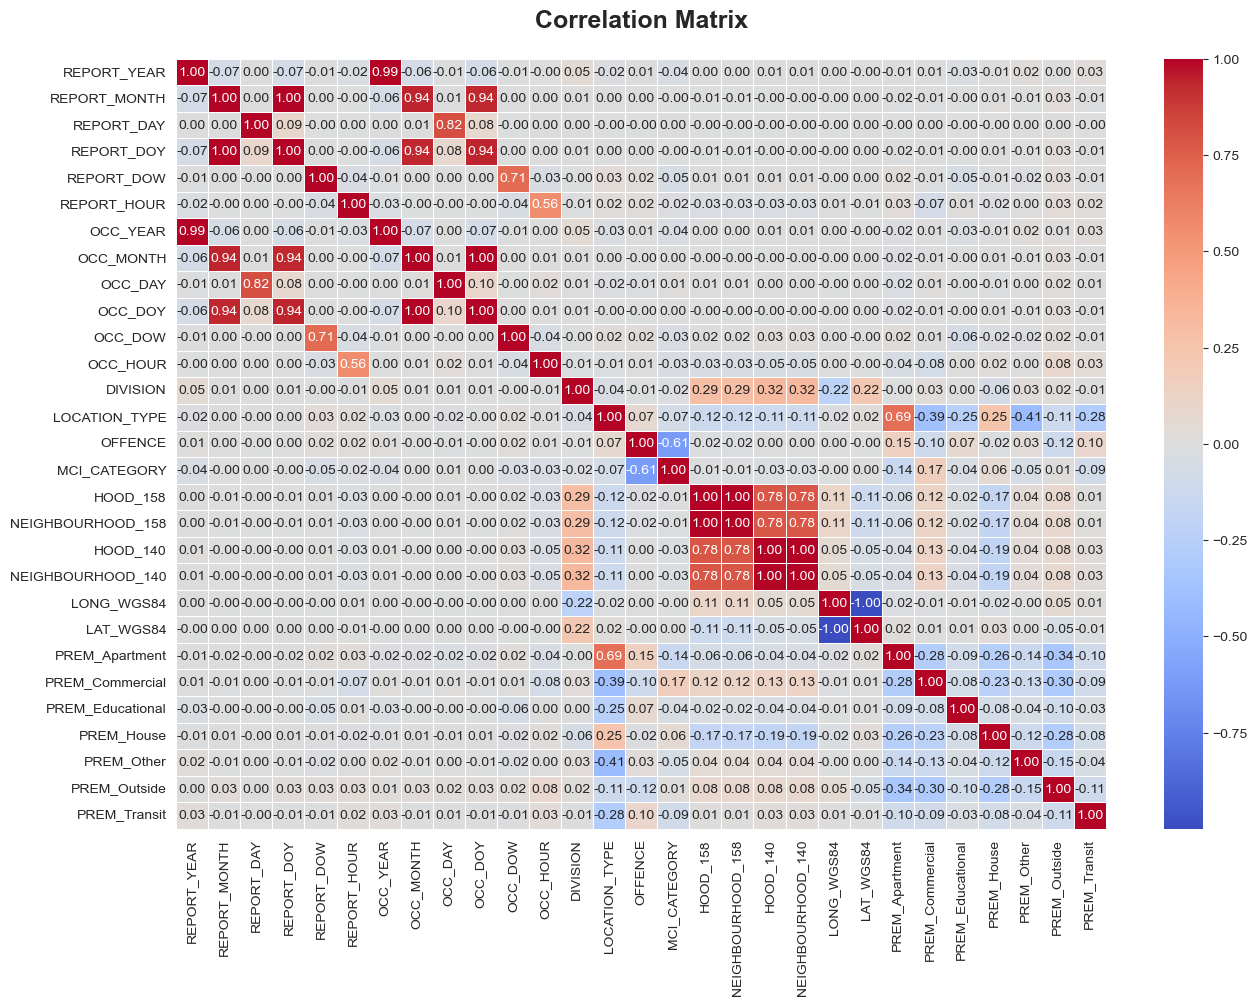

In [44]:
# Calculate correlation matrix
corr_matrix = df_normalized.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix',fontsize=18, fontweight='bold', y=1.03)
plt.show()

## RandomForest Classifier Baseline Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset into training and testing sets
X = df_normalized.drop(columns=['MCI_CATEGORY'])  # Features
y = df_normalized['MCI_CATEGORY']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9568538887262488
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     38029
           1       1.00      1.00      1.00     11130
           2       0.98      0.96      0.97     13643
           3       0.89      0.87      0.88      6535
           4       0.90      0.60      0.72      2396

    accuracy                           0.96     71733
   macro avg       0.94      0.88      0.91     71733
weighted avg       0.96      0.96      0.96     71733



**Analysis of Results:**
   - The accuracy of the model on the test data is approximately 95.69%, which indicates that the model is performing well in predicting the target variable.
   - Classification report :
     - **Class 0:** The precision, recall, and F1-score are all high, indicating good performance in predicting this class.
     - **Class 1:** The precision, recall, and F1-score are all 1.00, indicating perfect performance for this class.
     - **Class 2:** Precision, recall, and F1-score are also high, indicating good performance.
     - **Class 3:** Precision, recall, and F1-score are relatively lower compared to other classes.
     - **Class 4:** Precision, recall, and F1-score are lower compared to other classes, indicating that the model has more difficulty predicting this class, especially in terms of recall.
   - The macro average and weighted average of precision, recall, and F1-score provide overall performance metrics for the model across all classes. While the weighted average metrics are higher due to considering class distribution, the macro average metrics offer insights into the model's performance across all classes, regardless of their frequency in the dataset. All in All, with high values for both macro and weighted average metrics, the model demonstrates strong performance in predicting crime categories on this dataset.

The Random Forest Classifier seems to perform well, achieving high accuracy and demonstrating good performance across most classes.

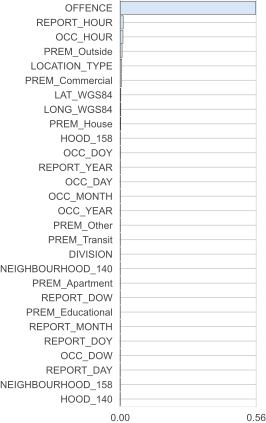

In [47]:
# check the feature importance from the model
from rfpimp import *
I = importances(rf_classifier, X, y)
plot_importances(I)

In [48]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances along with feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

Top 10 Most Important Features:
          Feature  Importance
14        OFFENCE    0.586432
13  LOCATION_TYPE    0.041168
5     REPORT_HOUR    0.039062
11       OCC_HOUR    0.034348
26   PREM_Outside    0.025780
19     LONG_WGS84    0.025747
20      LAT_WGS84    0.023741
9         OCC_DOY    0.016339
3      REPORT_DOY    0.016245
8         OCC_DAY    0.014928


In [49]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importance scores
feature_importance_perm = perm_importance.importances_mean

# Print feature importance
for i, imp in enumerate(feature_importance_perm.argsort()[::-1][:10]):
    print(f"Feature {X.columns[imp]} importance: {feature_importance_perm[imp]}")

Feature OFFENCE importance: 0.5284708572065855
Feature REPORT_HOUR importance: 0.00878256869223375
Feature LOCATION_TYPE importance: 0.008530244099647333
Feature PREM_Outside importance: 0.007714719863939912
Feature OCC_HOUR importance: 0.00639872861862747
Feature PREM_Commercial importance: 0.0050046700960506675
Feature PREM_House importance: 0.0022235233435100032
Feature LAT_WGS84 importance: 0.0007639440703721134
Feature LONG_WGS84 importance: 0.00041542943972794344
Feature REPORT_YEAR importance: 0.000369425508482879


In [50]:
from sklearn.linear_model import LassoCV

# Initialize Lasso Regression
lasso = LassoCV(cv=5)

# Fit Lasso Regression
lasso.fit(X_train, y_train)

# Get coefficients and corresponding feature names
coefficients = lasso.coef_
feature_names = X.columns

# Create a dictionary to store feature coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort features based on their coefficients in descending order
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Select top 10 features
top_10_features = [feature[0] for feature in sorted_features[:10]]

print("Top 10 Features:")
for feature in top_10_features:
    print(feature)

Top 10 Features:
OFFENCE
PREM_Commercial
PREM_House
REPORT_YEAR
PREM_Transit
OCC_HOUR
LOCATION_TYPE
OCC_YEAR
REPORT_DOW
REPORT_HOUR


## RandomForest Classifier Final Model

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset into training and testing sets
X = df_normalized[['OFFENCE','LOCATION_TYPE','OCC_HOUR','REPORT_HOUR','PREM_Outside','PREM_Commercial','REPORT_YEAR','PREM_Transit',
                   'OCC_YEAR','REPORT_DOW']]  # Features
y = df_normalized['MCI_CATEGORY']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9845538315698493
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     38029
           1       1.00      1.00      1.00     11130
           2       1.00      0.99      0.99     13643
           3       0.96      0.95      0.95      6535
           4       0.91      0.87      0.89      2396

    accuracy                           0.98     71733
   macro avg       0.97      0.96      0.96     71733
weighted avg       0.98      0.98      0.98     71733



## Logistic Regression:

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=10000)

# Train the classifier
logreg_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5825352348291581
              precision    recall  f1-score   support

           0       0.65      0.74      0.69     38029
           1       0.62      0.26      0.37     11130
           2       0.41      0.40      0.41     13643
           3       0.51      0.80      0.62      6535
           4       0.34      0.05      0.09      2396

    accuracy                           0.58     71733
   macro avg       0.51      0.45      0.44     71733
weighted avg       0.58      0.58      0.56     71733



**Analysis of Results:**
   - The accuracy of the model on the test data is approximately 65.19%, which indicates that accuracy of the model has decreased significantly compared to Random Forest Classifier.
   *Classification Report:
- **Class 0:** Precision, recall, and F1-score are all relatively high, suggesting the model's ability to predict this class effectively.
- **Class 1:** Precision and recall are moderate, indicating need of improvement in predicting this class.
- **Class 2:** Precision, recall, and F1-score are relatively low, indicating challenges in predicting this class accurately.
- **Class 3:** Precision, recall, and F1-score are moderate compared to class 2 and 4, suggesting better performance in predicting this class.
- **Class 4:** Precision, recall, and F1-score are the lowest among all classes, indicating significant difficulty in predicting this class accurately
   - The macro average and weighted average of precision, recall, and F1-score provide overall performance metrics for the model across all classes. However, the values are lower than desired, suggesting that the model's predictive capability may be hindered by class imbalances and the model struggles to maintain consistent performance across different classes, indicating room for improvement in its predictive ability for less frequent classes.

The model shows moderate accuracy, with notable variations in performance across different classes. While some classes are predicted with high precision and recall, others exhibit lower performance metrics, especially class.

## Decision Trees

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9999302970738712
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38029
           1       1.00      1.00      1.00     11130
           2       1.00      1.00      1.00     13643
           3       1.00      1.00      1.00      6535
           4       1.00      1.00      1.00      2396

    accuracy                           1.00     71733
   macro avg       1.00      1.00      1.00     71733
weighted avg       1.00      1.00      1.00     71733



**Analysis of Results:**

- The Decision Tree classifier achieved an exceptional accuracy of approximately 99.99% on the test data, indicating highly accurate predictions of the target variable.

- Classification Report:
   - **Class 0:** Precision, recall, and F1-score are all 1.00, suggesting perfect performance in predicting this class.
   - **Class 1:** Similarly, precision, recall, and F1-score are all 1.00, indicating flawless performance for this class.
   - **Class 2:** Precision, recall, and F1-score are all 1.00, reflecting excellent predictive performance.
   - **Class 3:** Precision, recall, and F1-score are also 1.00, indicating perfect performance in predicting this class.
   - **Class 4:** Precision, recall, and F1-score are all 1.00, suggesting impeccable performance in predicting this class.
   
- The weighted average precision, recall, and F1-score are all 1.00, indicating outstanding overall performance of the model across all classes, considering the class distribution.The macro average precision, recall, and F1-score are also 1.00, providing further evidence of flawless performance across all classes, regardless of their frequency in the dataset.


   The Decision Tree classifier demonstrates remarkable accuracy and precision in predicting crime categories, achieving perfect scores across all evaluation metrics. This exceptional performance suggests that the model is highly effective in classifying major crime indicators based on the provided dataset.

## Gradient Boosting Machines (XGBoost)

In [54]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9999302970738712
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38029
           1       1.00      1.00      1.00     11130
           2       1.00      1.00      1.00     13643
           3       1.00      1.00      1.00      6535
           4       1.00      1.00      1.00      2396

    accuracy                           1.00     71733
   macro avg       1.00      1.00      1.00     71733
weighted avg       1.00      1.00      1.00     71733



**Analysis of Results:**

- The XGBoost just like Decision Tree classifier  achieved an exceptional accuracy of approximately 99.99% on the test data, indicating highly accurate predictions of the target variable.

- Classification Report:
   - **Class 0:** Precision, recall, and F1-score are all 1.00, suggesting perfect performance in predicting this class.
   - **Class 1:** Similarly, precision, recall, and F1-score are all 1.00, indicating flawless performance for this class.
   - **Class 2:** Precision, recall, and F1-score are all 1.00, reflecting excellent predictive performance.
   - **Class 3:** Precision, recall, and F1-score are also 1.00, indicating perfect performance in predicting this class.
   - **Class 4:** Precision, recall, and F1-score are all 1.00, suggesting impeccable performance in predicting this class.
   
- The weighted average precision, recall, and F1-score are all 1.00, indicating outstanding overall performance of the model across all classes, considering the class distribution.The macro average precision, recall, and F1-score are also 1.00, providing further evidence of flawless performance across all classes, regardless of their frequency in the dataset.


   The XGBoost model showcases remarkable accuracy and precision similar to the Decision Tree classifier, achieving perfect scores across all evaluation metrics. This suggests that XGBoost, with its enhanced boosting techniques, is highly adept at classifying major crime indicators based on the provided dataset. The model's robust performance underscores its effectiveness in capturing intricate patterns and relationships within the data, making it a powerful tool for crime prediction tasks.

## Lazy Predict Modeling 

In [55]:
import logging
# Set logging level to suppress info and warning messages from LightGBM
logging.getLogger('lightgbm').setLevel(logging.ERROR)

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Splitting the dataset into features (X) and target variable (y)
X = df_normalized[['OFFENCE','LOCATION_TYPE','OCC_HOUR','REPORT_HOUR','PREM_Outside','PREM_Commercial','REPORT_YEAR','PREM_Transit',
                   'OCC_YEAR','REPORT_DOW']]  # Features
y = df_normalized['MCI_CATEGORY']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(predictions=True)

# Fit and predict using LazyClassifier
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance report
print(models)


 97%|█████████▋| 28/29 [1:28:00<11:07, 667.25s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 286930, number of used features: 10
[LightGBM] [Info] Start training from score -0.631412
[LightGBM] [Info] Start training from score -1.871577
[LightGBM] [Info] Start training from score -1.667554
[LightGBM] [Info] Start training from score -2.382811
[LightGBM] [Info] Start training from score -3.402802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

100%|██████████| 29/29 [1:28:08<00:00, 182.37s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
ExtraTreesClassifier               0.99               0.98    None      0.99   
RandomForestClassifier             0.98               0.96    None      0.98   
ExtraTreeClassifier                0.95               0.90    None      0.95   
SVC                                0.84               0.71    None      0.84   
KNeighborsClassifier               0.85               0.71    None      0.84   
QuadraticDiscriminantAnalysis      0.80               0.70    None      0.80   
GaussianNB                         0.79 

## Neural Networks

Epoch 1/10
7174/7174 [==============================] - 16s 2ms/step - loss: 0.4880 - accuracy: 0.7835 - val_loss: 0.3739 - val_accuracy: 0.8267
Epoch 2/10
7174/7174 [==============================] - 16s 2ms/step - loss: 0.3722 - accuracy: 0.8270 - val_loss: 0.3328 - val_accuracy: 0.8444
Epoch 3/10
7174/7174 [==============================] - 15s 2ms/step - loss: 0.3261 - accuracy: 0.8520 - val_loss: 0.2661 - val_accuracy: 0.8827
Epoch 4/10
7174/7174 [==============================] - 17s 2ms/step - loss: 0.2848 - accuracy: 0.8714 - val_loss: 0.2441 - val_accuracy: 0.8899
Epoch 5/10
7174/7174 [==============================] - 18s 3ms/step - loss: 0.2850 - accuracy: 0.8705 - val_loss: 0.2564 - val_accuracy: 0.8885
Epoch 6/10
7174/7174 [==============================] - 19s 3ms/step - loss: 0.3105 - accuracy: 0.8570 - val_loss: 0.2796 - val_accuracy: 0.8725
Epoch 7/10
7174/7174 [==============================] - 18s 2ms/step - loss: 0.2966 - accuracy: 0.8656 - val_loss: 0.2572 - val_ac

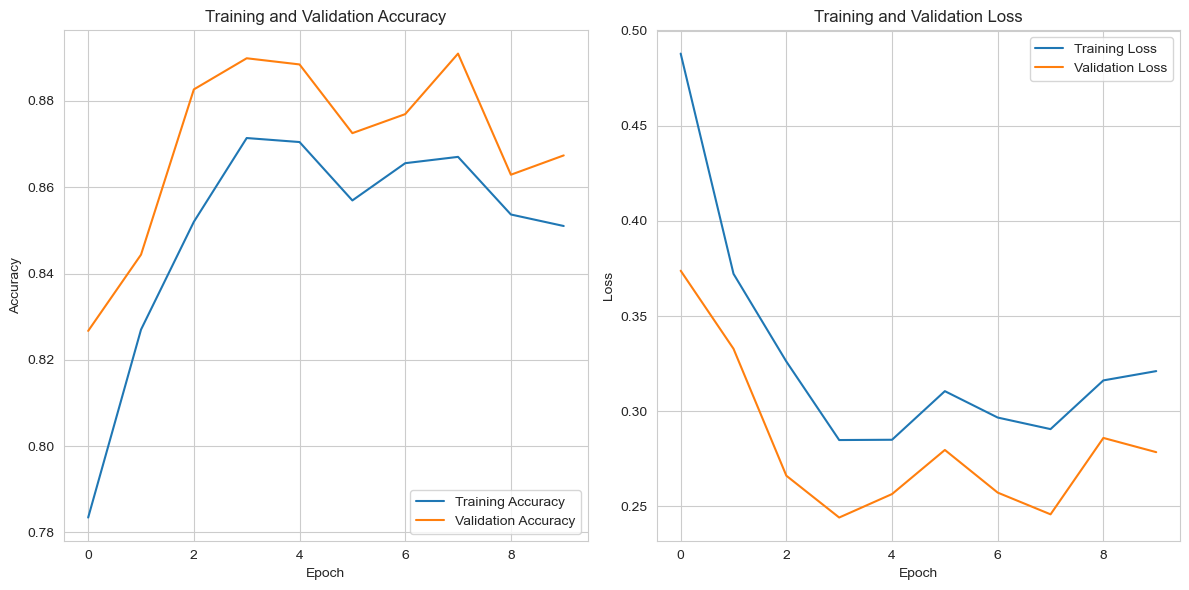

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import History  # Import History callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Define a callback to track training history
history_callback = History()

# Encode target variable for multi-class classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for multi-class
              metrics=['accuracy'])

# Train the model and track training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[history_callback])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)

# Decode predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Classification report
print(classification_report(y_test, y_pred))

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

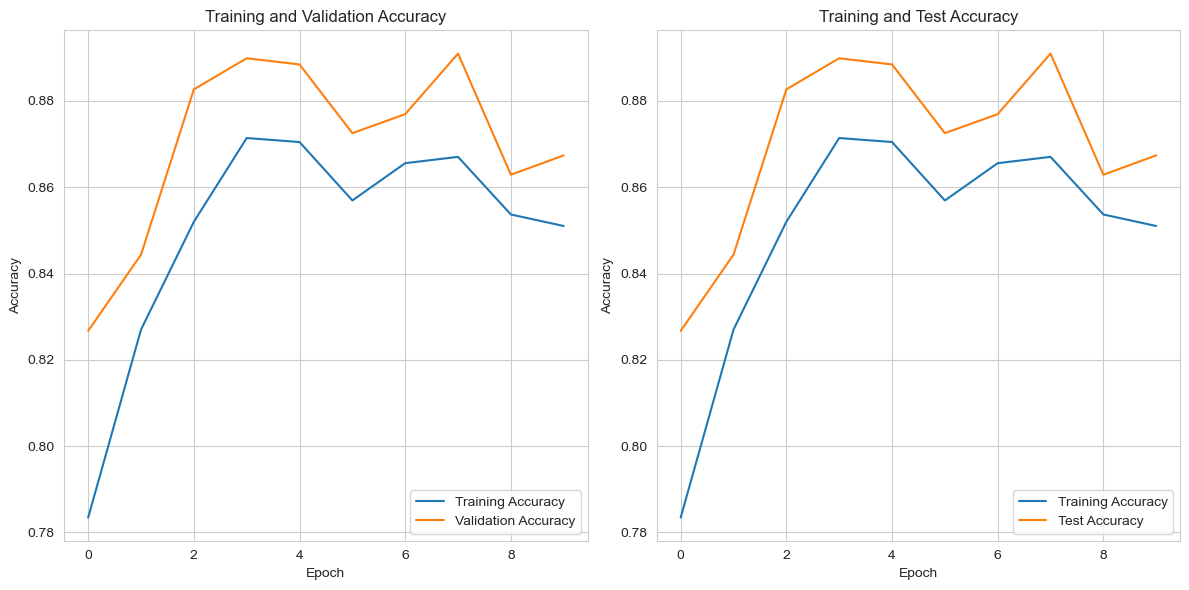

In [102]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Analysis of Results:**

- The neural network model achieved a test accuracy of approximately 83.68%, indicating decent performance in predicting the target variable.

- Classification Report:
   - **Class 0:** Precision, recall, and F1-score are all high, indicating excellent performance in predicting this class.
   - **Class 1:** Precision is moderate, indicating a decent proportion of true positive predictions out of all positive predictions made by the model. Recall is high, suggesting the model effectively captures a significant portion of actual instances of this class. The F1-score, which considers both precision and recall, reflects a balanced measure of the model's performance for this class.
   - **Class 2:** Precision is high, indicating a good proportion of true positive predictions out of all positive predictions made by the model. However, recall is relatively lower, suggesting the model may miss some actual instances of this class. The F1-score provides a balance between precision and recall, indicating the overall performance of the model for this class.
   - **Class 3:** Precision is moderate, indicating a decent proportion of true positive predictions out of all positive predictions made by the model. Recall is high, suggesting the model captures a significant portion of actual instances of this class. The F1-score reflects a balanced measure of the model's performance for this class.
   - **Class 4:** Precision is relatively low, indicating a lower proportion of true positive predictions out of all positive predictions made by the model. Recall is also low, suggesting the model misses a substantial portion of actual instances of this class. Consequently, the F1-score, which considers both precision and recall, is relatively low, reflecting the challenges the model faces in predicting this class accurately.
   
- The macro average and weighted average of precision, recall, and F1-score provide overall performance metrics for the model across all classes. While the weighted average metrics are higher due to considering class distribution, the macro average metrics offer insights into the model's performance across all classes, regardless of their frequency in the dataset. All in All, with high values for both macro and weighted average metrics, the model demonstrates strong performance in predicting crime categories on this dataset.


   The neural network model demonstrates reasonable accuracy and precision in predicting crime categories. While it shows strong performance for some classes, particularly class 0 and class 1, it struggles with others, such as class 4.

# Time Series Modeling

In [65]:
# original dataframe copy taken ealrier before EDA Analysis.
df_all.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,1,GO-20141265238,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,Wednesday,0,...,1430,100,Assault,Assault,98,Rosedale-Moore Park,98,Rosedale-Moore Park (98),-79.38,43.67
1,2,GO-20141259834,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,Wednesday,0,...,1420,100,Assault With Weapon,Assault,55,Thorncliffe Park,55,Thorncliffe Park (55),-79.35,43.70
2,3,GO-20141262027,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,Wednesday,10,...,1430,100,Assault,Assault,166,St Lawrence-East Bayfront-The Islands,77,Waterfront Communities-The Island (77),-79.38,43.65
3,4,GO-20141259951,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,Wednesday,3,...,1460,100,Assault Peace Officer,Assault,170,Yonge-Bay Corridor,76,Bay Street Corridor (76),-79.38,43.65
4,5,GO-20141261561,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,Wednesday,8,...,1420,100,Assault With Weapon,Assault,154,Oakdale-Beverley Heights,26,Downsview-Roding-CFB (26),-79.51,43.72


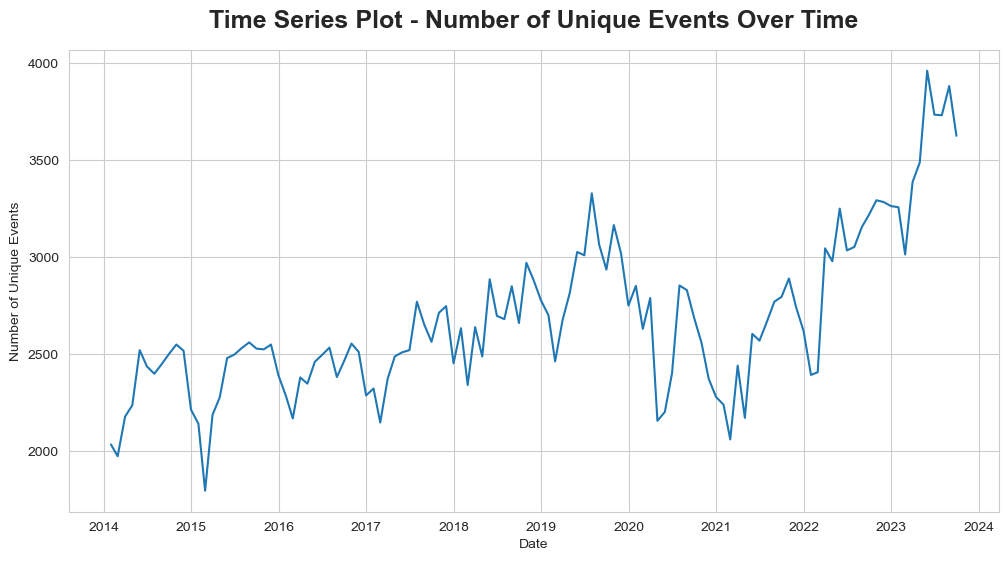

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime objects for better analysis
df_all['REPORT_DATE'] = pd.to_datetime(df_all['REPORT_DATE'])
df_all['OCC_DATE'] = pd.to_datetime(df_all['OCC_DATE'])

# Count the number of unique events per month
monthly_counts = df_all.resample('M', on='REPORT_DATE')['EVENT_UNIQUE_ID'].nunique()

# Create a DataFrame with the date and number of unique events
df_ts = pd.DataFrame({'Date': monthly_counts.index.date, 'Number of Unique Events': monthly_counts.values})

# Plot the number of unique events over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Number of Unique Events', data=df_ts)
plt.title('Time Series Plot - Number of Unique Events Over Time',fontsize=18, fontweight='bold', y=1.03)
plt.xlabel('Date')
plt.ylabel('Number of Unique Events')
plt.show()

- The graph is a time series plot that displays the number of unique events over time, spanning from 2014 to early 2024

- There is a clear upward trend in the number of unique events over the given time period. This suggests a growth pattern in the occurrence of these events.

- The growth does not appear to be linear; there are periods with steeper increases and periods of relative stability or slight decline.

In [67]:
df_ts = df_ts.rename(columns = {'Number of Unique Events': 'events'})

In [68]:
df_ts.set_index('Date', inplace=True)
df_ts.head()

,events
Date,
2014-01-31,2032
2014-02-28,1971
2014-03-31,2176
2014-04-30,2234
2014-05-31,2519


In [69]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_ts['events'])
# Print test statistic
print(result)

(0.03374725351765805, 0.9612355563208336, 12, 104, {'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}, 1361.7169720119625)


- p-value: 0.9612355563208336

The p-value is greater than 0.05. Typically, if the p-value is greater than 0.05, we fail to reject the null hypothesis (the time series is non-stationary). Here, the high p-value suggests that we cannot reject the null hypothesis.

In [70]:
df_diff = df_ts.diff().dropna()
df_diff.head(10)

,events
Date,
2014-02-28,-61.00
2014-03-31,205.00
2014-04-30,58.00
2014-05-31,285.00
2014-06-30,-84.00
2014-07-31,-38.00
2014-08-31,50.00
2014-09-30,52.00
2014-10-31,49.00


In [71]:
df_diff.describe()

,events
count,116.00
mean,13.74
std,201.45
min,-634.00
25%,-123.50
50%,12.50
75%,113.75
max,640.00


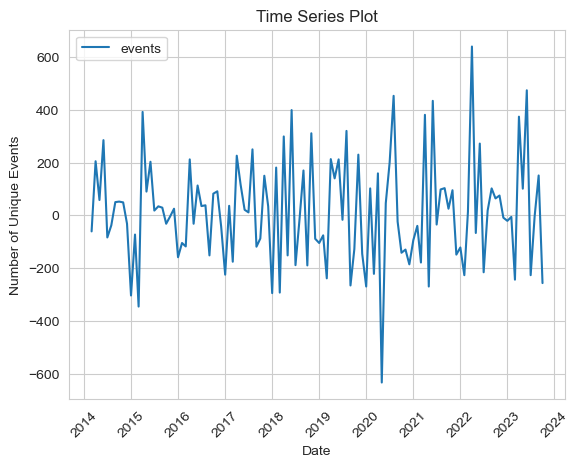

In [72]:
# Plot the time series using the DataFrame's .plot() method.
df_diff.plot()
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Number of Unique Events')
plt.xticks(rotation=45)
plt.show()

 - The graph provided is a time series plot that represents the "Number of Unique Events" variable over time, from 2014 to early 2024.

 - The time series data shows significant fluctuations around a mean that appears to be close to zero. Such fluctuations indicate high
  volatility in the Number of Unique Event over time.
  
 - The data points exhibit sharp increases and decreases (spikes and dips), which may represent sudden changes in Number of Unique Events.

In [73]:
# Run Dicky-Fuller test
result = adfuller(df_diff['events'])
print(result)

(-1.6956705141931916, 0.43334452747073016, 13, 102, {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}, 1341.433345391598)


- p-value: 0.433344527470727

The p-value is still greater than 0.05, but it has decreased. This suggests that differencing has helped in making the time series more stationary, but it may still not be enough to reject the null hypothesis.

### SARIMAX Model Seasonal Data

In [74]:
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")

# Instantiate the model
arma = SARIMAX(df_ts, order=(1,1,2))
results = arma.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 events   No. Observations:                  117
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -773.973
Date:                Wed, 27 Mar 2024   AIC                           1555.946
Time:                        15:54:35   BIC                           1566.961
Sample:                    01-31-2014   HQIC                          1560.418
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5391      0.336     -1.607      0.108      -1.197       0.119
ma.L1          0.3599      0.308      1.167      0.243      -0.245       0.964
ma.L2          0.1490      0.138      1.083      0.2

#### Use the grid search method to calculate the parameter p and q

In [75]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(df_ts, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

In [76]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q     AIC     BIC
8  2  2 1571.31 1587.89
7  2  1 1571.74 1585.55
5  1  2 1571.93 1585.74
6  2  0 1573.07 1584.12
4  1  1 1574.68 1585.73
3  1  0 1575.83 1584.12
2  0  2 1614.79 1625.84
1  0  1 1670.38 1678.66
0  0  0 1741.87 1747.39
   p  q     AIC     BIC
3  1  0 1575.83 1584.12
6  2  0 1573.07 1584.12
7  2  1 1571.74 1585.55
4  1  1 1574.68 1585.73
5  1  2 1571.93 1585.74
8  2  2 1571.31 1587.89
2  0  2 1614.79 1625.84
1  0  1 1670.38 1678.66
0  0  0 1741.87 1747.39


In [77]:
# Instantiate the model
arma = SARIMAX(df_ts, order=(2,1,2))
results = arma.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 events   No. Observations:                  117
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -773.216
Date:                Wed, 27 Mar 2024   AIC                           1556.433
Time:                        15:54:38   BIC                           1570.201
Sample:                    01-31-2014   HQIC                          1562.022
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0611      0.404      0.151      0.880      -0.731       0.854
ar.L2          0.5222      0.206      2.540      0.011       0.119       0.925
ma.L1         -0.3541      0.408     -0.868      0.3

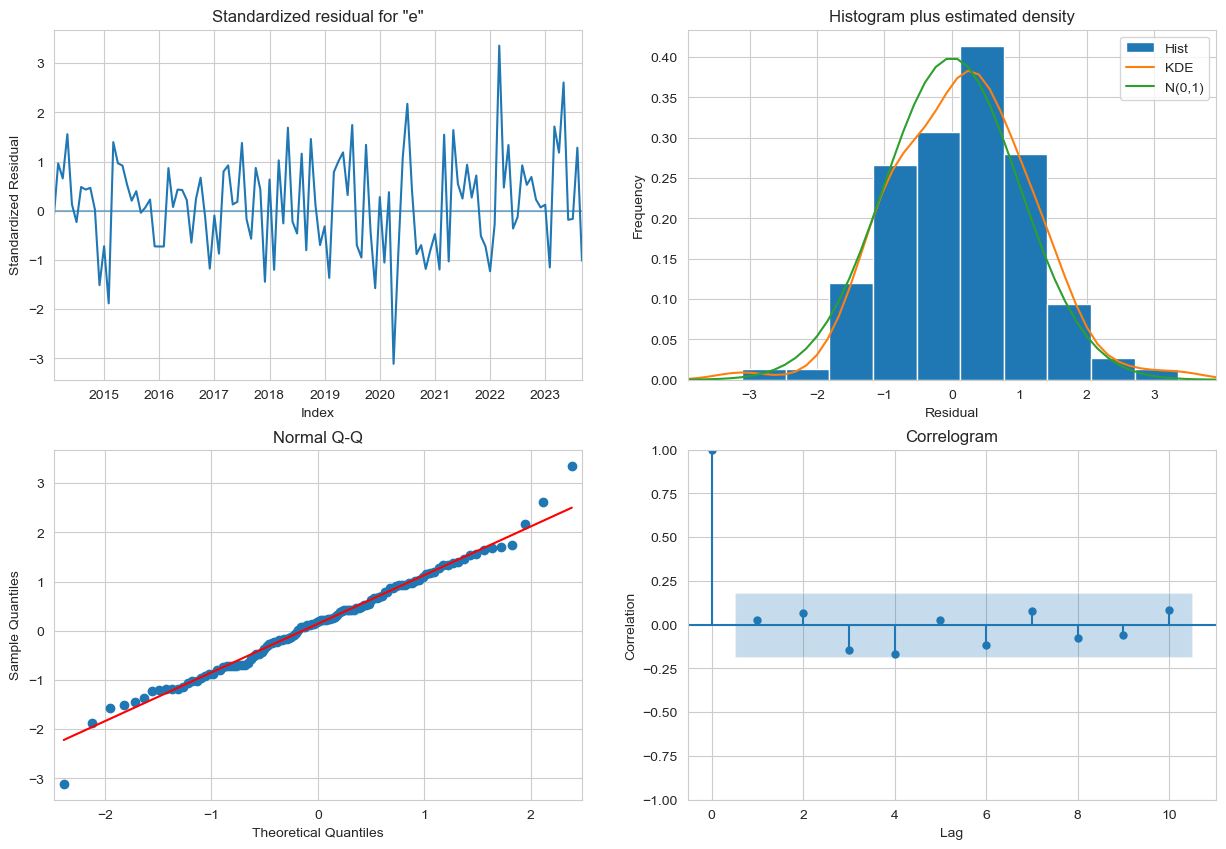

In [78]:
# Create the 4 diagostics plots
# Plot diagnostics
fig = results.plot_diagnostics(figsize=(15, 10))

# Update labels
fig.axes[0].set_xlabel('Index')
fig.axes[0].set_ylabel('Standardized Residual')

fig.axes[1].set_xlabel('Residual')
fig.axes[1].set_ylabel('Frequency')

fig.axes[2].set_xlabel('Theoretical Quantiles')
fig.axes[2].set_ylabel('Sample Quantiles')

fig.axes[3].set_xlabel('Lag')
fig.axes[3].set_ylabel('Correlation')

# Show the plots
plt.show()

This viz represents model diagnostics for regression analysis. Each plot provides different information about the residuals, which are the differences between the observed values and the values predicted by a statistical or machine learning model.

1. **Standardized Residual Plot:**
   - This plot shows the standardized residuals of the model over time or index. Standardized residuals are the residuals divided by their
   estimated standard deviation.
   - There doesn't appear to be any clear pattern in the residuals over time, which is good as it suggests there are no obvious trends or seasonal effects that the model has failed to capture. However, there are some periods, particularly around late 2021 and early 2022, where the variability of the residuals seems to increase, suggesting periods of greater volatility or model instability.

2. **Histogram and Estimated Density Plot:**
   - The histogram (blue bars) shows the distribution of the residuals. The kernel density estimate (KDE; orange line) provides a smoothed version of the histogram. The green line represents a standard normal distribution (N(0,1)).
   - The histogram and KDE suggest that the residuals are approximately normally distributed as they follow the shape of the normal distribution curve closely, but there are some deviations, especially in the tails. This is also indicated by the presence of a few residuals beyond the -3 to 3 range.

3. **Normal Q-Q Plot:**
   - The Q-Q plot compares the quantiles of the residuals to the quantiles of a normal distribution.
   - Most points in the Q-Q plot lie close to the reference line, suggesting that the residuals are normally distributed. However, the points at the ends deviate from the line, indicating that the distribution has heavier tails than the normal distribution. This could mean that extreme values are more likely than would be expected under a normal distribution.

4. **Correlogram:**
   - This correlogram shows the autocorrelation of the residuals at different lags. Autocorrelation is the correlation of the residuals with themselves at previous times.
   - All the autocorrelation coefficients fall within the blue shaded area, which represents a 95% confidence interval for the autocorrelation to be zero. This implies that there is no significant autocorrelation at any lag, satisfying one of the key assumptions of a good regression model, which is that the residuals are independent of each other.

In conclusion, the diagnostic plots indicate that the model is performing fairly well, with residuals that are largely independent and normally distributed.

### Generate one step forecast

In [79]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower events']
upper_limits = confidence_intervals.loc[:,'upper events']

# Print best estimate predictions
print(mean_forecast)

2022-10-31   3162.65
2022-11-30   3240.83
2022-12-31   3250.01
2023-01-31   3233.43
2023-02-28   3231.61
2023-03-31   3062.00
2023-04-30   3263.48
2023-05-31   3467.08
2023-06-30   3769.75
2023-07-31   3763.34
2023-08-31   3639.64
2023-09-30   3818.27
Freq: M, Name: predicted_mean, dtype: float64


In [80]:
print("lower_limits",lower_limits,"upper_limits",upper_limits)

lower_limits 2022-10-31   2790.72
2022-11-30   2868.91
2022-12-31   2878.09
2023-01-31   2861.51
2023-02-28   2859.69
2023-03-31   2690.07
2023-04-30   2891.56
2023-05-31   3095.16
2023-06-30   3397.82
2023-07-31   3391.42
2023-08-31   3267.72
2023-09-30   3446.35
Freq: M, Name: lower events, dtype: float64 upper_limits 2022-10-31   3534.57
2022-11-30   3612.76
2022-12-31   3621.94
2023-01-31   3605.36
2023-02-28   3603.53
2023-03-31   3433.92
2023-04-30   3635.41
2023-05-31   3839.00
2023-06-30   4141.67
2023-07-31   4135.26
2023-08-31   4011.57
2023-09-30   4190.20
Freq: M, Name: upper events, dtype: float64


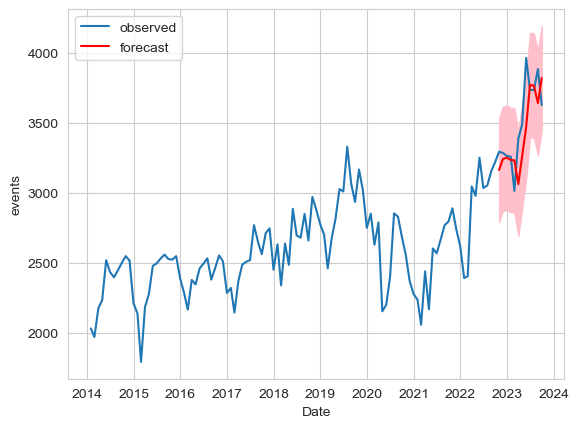

In [81]:
# plot the  data
plt.plot(df_ts.index, df_ts, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('events')
plt.legend()
plt.show()

This graph represents a time series analysis, displaying both historical data (observed) and future predictions (forecast). The x-axis indicates time, in this case, years from 2014 to early 2024, and the y-axis represents events.

Here are the key points from the graph:

1. **Observed Data (Blue Line):**
   - The blue line indicates the observed events over time, from 2014 to  early 2024.
   - There's a visible trend in the observed data with some fluctuations. The events appears to generally increase over time, though there are periods of both rise and fall, which could be indicative of seasonal patterns, cycles, or other factors influencing events.

2. **Forecast Data (Red Line with Shaded Area):**
   - The red line indicates the forecasted events, starting where the observed data ends. The model used for forecasting projects an increase in events shortly after the last observed data point.
   - The forecast suggests some volatility as it fluctuates rather than following a smooth trend.
   - The pink shaded area around the forecast line represents the confidence interval, which illustrates the range of uncertainty in the predictions. The interval is relatively narrow at the start of the forecast but widens as time progresses, indicating more uncertainty in the longer-term outlook.



### Generate Dynamic Predictions

In [82]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower events']
upper_limits = confidence_intervals.loc[:,'upper events']

# Print best estimate predictions
print(mean_forecast)

2022-10-31   3162.65
2022-11-30   3148.67
2022-12-31   3118.91
2023-01-31   3109.79
2023-02-28   3093.68
2023-03-31   3087.94
2023-04-30   3079.18
2023-05-31   3075.64
2023-06-30   3070.85
2023-07-31   3068.71
2023-08-31   3066.07
2023-09-30   3064.80
Freq: M, Name: predicted_mean, dtype: float64


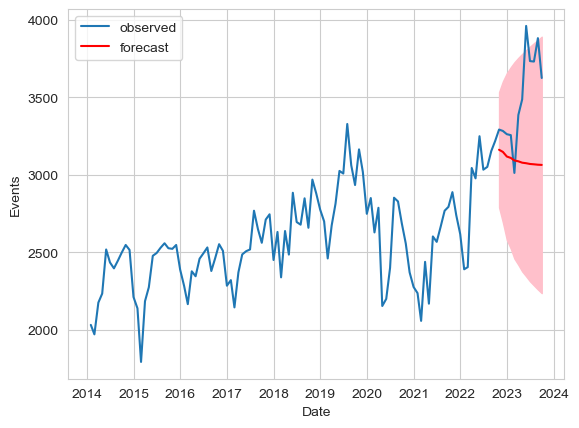

In [83]:
# plot the  data
plt.plot(df_ts.index, df_ts, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Events')
plt.legend()
plt.show()

This graph represents a time series analysis, displaying both historical data (observed) and future predictions (forecast). The x-axis indicates time, in this case, years from 2014 to early 2024, and the y-axis represents events.

Here are the key points from the graph:

1. **Observed Data (Blue Line):**
   - The blue line indicates the observed events over time, from 2014 to  early 2024.
   - There's a visible trend in the observed data with some fluctuations. The events appears to generally increase over time, though there are periods of both rise and fall, which could be indicative of seasonal patterns, cycles, or other factors influencing events.

2. **Forecast Data (Red Line with Shaded Area):**
   - The red line indicates the projected events based on the historical data. The forecast starts with a decline in events before leveling out.
  - This initial decline might be influenced by the last observed data points, which show a downward movement.

### Out of the Sample Predictions

In [84]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower events']
upper_limits = confidence_intervals.loc[:,'upper events']

# Print best estimate predictions
print(mean_forecast)

2023-10-31   3650.22
2023-11-30   3602.03
2023-12-31   3611.73
2024-01-31   3587.16
2024-02-29   3590.72
2024-03-31   3578.11
2024-04-30   3579.20
2024-05-31   3572.68
2024-06-30   3572.85
2024-07-31   3569.45
2024-08-31   3569.33
2024-09-30   3567.55
Freq: M, Name: predicted_mean, dtype: float64


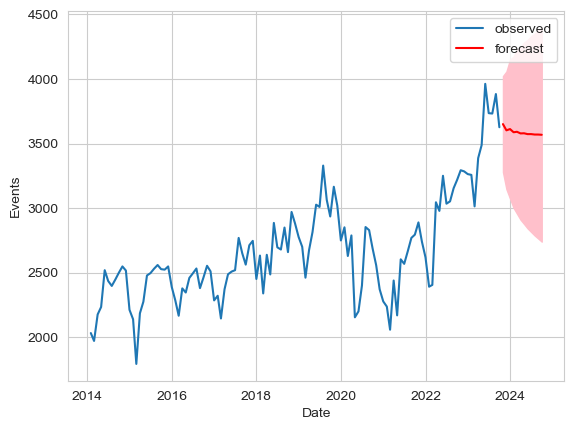

In [85]:
# plot the  data
plt.plot(df_ts.index, df_ts, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Events')
plt.legend()
plt.show()

This graph represents a time series analysis, displaying both historical data (observed) and future predictions (forecast). The x-axis indicates time, in this case, years from 2014 to beyond 2024, and the y-axis represents events.

Here are the key points from the graph:

1. **Observed Data (Blue Line):**
   - The blue line indicates the observed events over time, from 2014 up until the last data point before the forecast begins.
   - There's a visible trend in the observed data with some fluctuations. The events appears to generally increase over time, though there are periods of both rise and fall, which could be indicative of seasonal patterns, cycles, or other factors influencing events.

2. **Forecast Data (Red Line with Shaded Area):**
   - The red line marks the starting point of the forecast. This is the model's prediction of future events based on the historical data.The forecast shows a short-term decrease in events followed by a leveling out.
   - The shaded area around the forecast line represents the confidence interval or prediction interval. This shows the range within which the actual future events is expected to fall, with a certain level of confidence.


## LSTM Model 

In [86]:
#df_ts = df_ts.set_index(list(df_ts)[0])
df_ts.head()

,events
Date,
2014-01-31,2032
2014-02-28,1971
2014-03-31,2176
2014-04-30,2234
2014-05-31,2519


In [87]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming df_ts.events is your series
series = np.array(df_ts.events)

# Reshape the series to be a 2D array (required by MinMaxScaler)
series = series.reshape(-1, 1)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to the data and transform the data
scaled_series = scaler.fit_transform(series).flatten()  # Flatten the 2D array to 1D after scaling

# Print the shape of the scaled series
print(scaled_series.shape)


(117,)


In [88]:
# split a univariate sequence into samples
def create_data(sequence, time_stemp):
    X, Y = [], []
    for i in range(len(sequence)):
        if i+time_stemp > len(sequence)-1:
            break
        seq_x = sequence[i:(i+time_stemp)]
        seq_y=sequence[i + time_stemp]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X),  np.array(Y)

In [89]:
#transform to a supervised learning problem
X, y = create_data(scaled_series, 3)
print(X.shape, y.shape)
# show each sample
for i in range(len(X)):
    print(X[i], y[i])

(114, 3) (114,)
[0.11018903 0.08206547 0.17657907] 0.20331950207468874
[0.08206547 0.17657907 0.2033195 ] 0.3347164591977869
[0.17657907 0.2033195  0.33471646] 0.29598893499308443
[0.2033195  0.33471646 0.29598893] 0.27846934071000473
[0.33471646 0.29598893 0.27846934] 0.30152143845089907
[0.29598893 0.27846934 0.30152144] 0.3254956201014292
[0.27846934 0.30152144 0.32549562] 0.34808667588750586
[0.30152144 0.32549562 0.34808668] 0.33333333333333326
[0.32549562 0.34808668 0.33333333] 0.19317657906869523
[0.34808668 0.33333333 0.19317658] 0.15952051636698938
[0.33333333 0.19317658 0.15952052] 0.0
[0.19317658 0.15952052 0.        ] 0.1807284462886123
[0.15952052 0.         0.18072845] 0.22222222222222232
[0.         0.18072845 0.22222222] 0.31581373905025356
[0.18072845 0.22222222 0.31581374] 0.3241124942369755
[0.22222222 0.31581374 0.32411249] 0.3397879207007839
[0.31581374 0.32411249 0.33978792] 0.3531581373905026
[0.32411249 0.33978792 0.35315814] 0.33840479483633024
[0.33978792 0.35

In [90]:
print(X.shape, y.shape)
# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)

(114, 3) (114,)
(114, 3, 1)


## Split data for train and test

In [91]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
n_steps =3 # time steps
n_features =1

In [93]:
# List of optimizers to try
optimizers = ['adam', 'rmsprop', 'adamax']
epochs_list = [100, 50, 80]  # Different epochs to try

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Define model architecture
def create_model(optimizer):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Train and evaluate models with different optimizers and epochs
results = {}
for optimizer in optimizers:
    for epochs in epochs_list:
        model = create_model(optimizer)
        print(f"Training model with optimizer: {optimizer} and epochs: {epochs}")
        history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.1)
        loss = model.evaluate(X_test, y_test, verbose=0)
        train_loss = history.history['loss'][-1]  # Get the final loss value from training history
        results[(optimizer, epochs)] = {'loss': loss, 'train_loss': train_loss, 'history': history}
        print(f"Test Loss: {loss}, Training Loss: {train_loss}")  # Print both test and training loss
        print(".............................................................")

Training model with optimizer: adam and epochs: 100
Test Loss: 0.010084202513098717, Training Loss: 0.010436627082526684
.............................................................
Training model with optimizer: adam and epochs: 50
Test Loss: 0.011826680041849613, Training Loss: 0.01137666217982769
.............................................................
Training model with optimizer: adam and epochs: 80
Test Loss: 0.010701930150389671, Training Loss: 0.010717819444835186
.............................................................
Training model with optimizer: rmsprop and epochs: 100
Test Loss: 0.011743837036192417, Training Loss: 0.010331789962947369
.............................................................
Training model with optimizer: rmsprop and epochs: 50
Test Loss: 0.011850016191601753, Training Loss: 0.01209542527794838
.............................................................
Training model with optimizer: rmsprop and epochs: 80
Test Loss: 0.01180329173803329

In [95]:
best_optimizer = None
best_epochs = None
best_mse = float('inf')  # Initialize with a very large value

# Compare results
for (optimizer, epochs), result in results.items():
    mse = result['loss']  # Mean Squared Error (MSE)
    print(f"Optimizer: {optimizer}, Epochs: {epochs}, Test Loss (MSE): {mse}")
    
    # Check if current configuration has lower MSE
    if mse < best_mse:
        best_optimizer = optimizer
        best_epochs = epochs
        best_mse = mse

# Print best performance
print(f"\nBest Performance:")
print(f"Optimizer: {best_optimizer}, Epochs: {best_epochs}, Test Loss (MSE): {best_mse}")

Optimizer: adam, Epochs: 100, Test Loss (MSE): 0.010084202513098717
Optimizer: adam, Epochs: 50, Test Loss (MSE): 0.011826680041849613
Optimizer: adam, Epochs: 80, Test Loss (MSE): 0.010701930150389671
Optimizer: rmsprop, Epochs: 100, Test Loss (MSE): 0.011743837036192417
Optimizer: rmsprop, Epochs: 50, Test Loss (MSE): 0.011850016191601753
Optimizer: rmsprop, Epochs: 80, Test Loss (MSE): 0.011803291738033295
Optimizer: adamax, Epochs: 100, Test Loss (MSE): 0.012616290710866451
Optimizer: adamax, Epochs: 50, Test Loss (MSE): 0.01979539729654789
Optimizer: adamax, Epochs: 80, Test Loss (MSE): 0.013481558300554752

Best Performance:
Optimizer: adam, Epochs: 100, Test Loss (MSE): 0.010084202513098717


## Get predictions for train and test datasets

In [96]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test) 

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) for training and testing datasets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Mean Squared Error (MSE) for Training Data: {train_mse}")
print(f"Mean Squared Error (MSE) for Testing Data: {test_mse}")

1/1 [==============================] - 0s 40ms/step
Mean Squared Error (MSE) for Training Data: 0.012154664955507705
Mean Squared Error (MSE) for Testing Data: 0.013481558831046027


## Visualization of the actual data & predictions

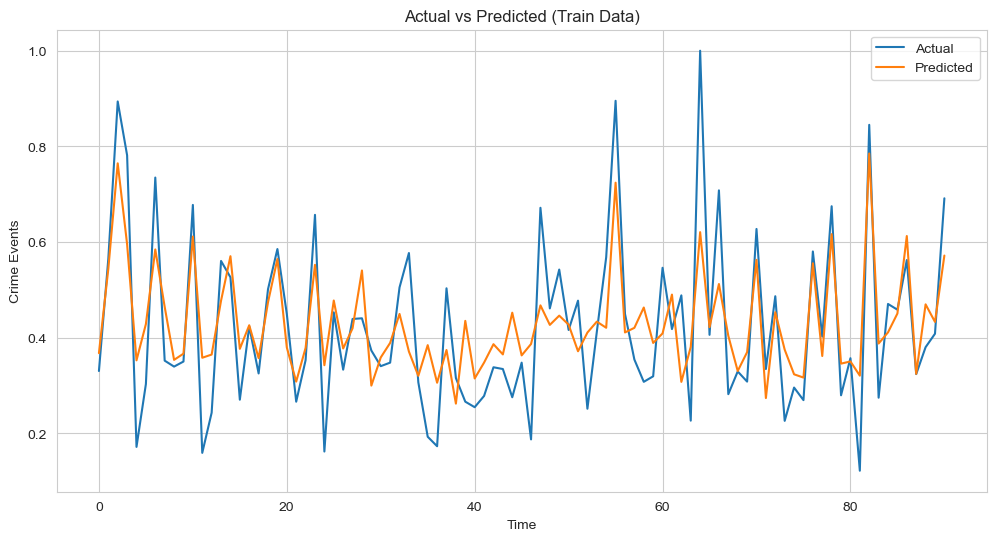

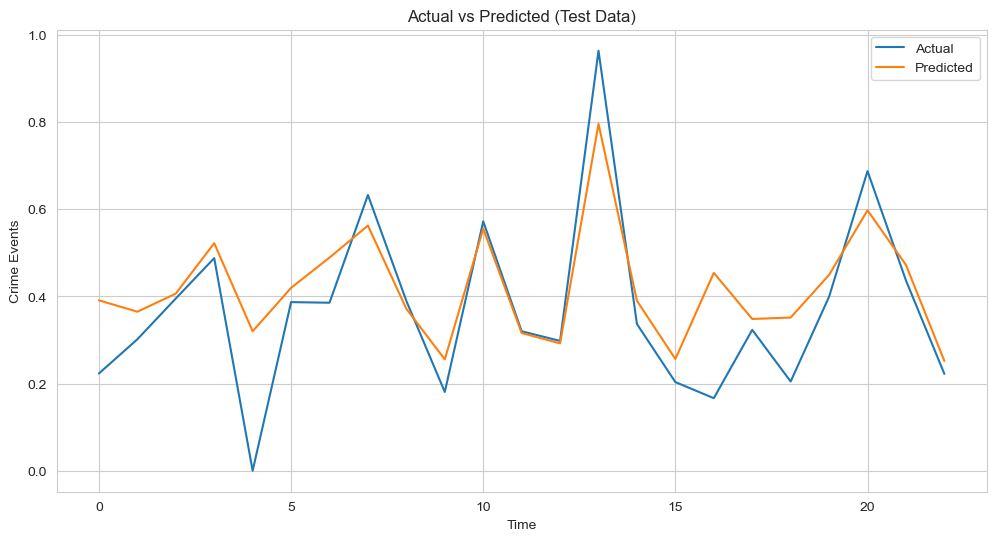

In [97]:
import matplotlib.pyplot as plt

# Visualize the actual data and predictions for train dataset
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Actual vs Predicted (Train Data)')
plt.xlabel('Time')
plt.ylabel('Crime Events')
plt.legend()
plt.show()

# Visualize the actual data and predictions for test dataset
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Actual vs Predicted (Test Data)')
plt.xlabel('Time')
plt.ylabel('Crime Events')
plt.legend()
plt.show()

The image presents two line plots that compare actual values to predicted values over time, which is a common way to assess the performance of a predictive model in both training and testing phases.

1. **Actual vs Predicted (Train Data):**
   - In this plot, there are areas where the model predicts the trends in the training data reasonably well, following the general direction and magnitude of the actual data points.
   - However, there are also periods where the predicted values diverge significantly from the actual values, suggesting that the model may not capture all the variability in the training data or may be reacting to noise.

2. **Actual vs Predicted (Test Data):**
   - The plot indicates that the model captures the trend of the test data to some extent, but there are noticeable discrepancies between the actual and predicted values. This suggests that while the model has learned some underlying patterns, it's not perfectly generalizing to new data.
   - The model seems to follow the peaks and troughs but not closely enough, which could mean that the model is underfitting, meaning it is too simple to capture the complex patterns in the data, or it might not be accounting for some influential variables.